<html lang="en" dir="ltr">
<heading>
  <h5>6.Assuming you know the current location of the bot and have a target location in space. Plan a straight line path 𝑝(𝑢) from start to end with P(0) = $P_1$ , P(1) = $P_2$ , v(0) = 0, v(1) = 0 ; u(t) ∈ [0, 1], P ∈ $R^3$ . Write a code for the same and plot position, velocity and acceleration vs time. Given this path, how will you control the bot? HINT: Use a cubic polynomial as a function of time, t, for u to satisfy all constraints. $u(t)=a_0t^3+a_1t^2+a_3t +a_4$</h5>
</heading>
<hr size="2" noshade="True">

<body>
  <p>
    This approach might be more practical & might generate more useful result.
      <br>
      <br>
      Since our focus is on the specified straight line trajectory with the specified boundary conditions, we can just apply a nonlinear transformation to the current coordinate system (translation + rotation) such that $\vec{P_1}$ becomes our new
    origin & $\vec{P_2}$ - $\vec{P_1}$ lies on the XZ plane. Basically shift the origin to point $\vec{P_1}$ and rotate the coordinate system about Z axis such that $\vec{P_2}$ - $\vec{P_1}$ lies on the XZ plane.
    <br>
    Let’s say $\vec{P_0}$ = $\vec{P_2}$ - $\vec{P_1}$ Let's assume the total time taken to cover the specified trajectory is T.
    <br>
    Now our problem statement becomes :
    <br>
    <center>
    Specified trajectory : P(t) ; t ∈ [0, T] ; P ∈ $R^3$
    <br>
    Boundary Conditions : P(0) = 0 ; P(T) = $P_0$ ; v(0) = 0 = v(T)
    <br>
       </center>
    <br>
    <center>
    <img src="https://raw.githubusercontent.com/Omegaconstant/Triphibian-Automation-App/main/Automation/6/Free-Body-Diagram.png" alt="Free Body Diagram">
    <h5>Free body Diagram</h5>
    </center>
    <br>    
    Now $T_h$ is the thrust Force & $\theta$ is the instantaneous roll angle.
    <br>
    Now Force equations :
        $$ T_hcos (\theta) - mg = m\ddot{z} $$
        $$ T_hsin (\theta) = m\ddot{x} $$
    Also :
        $$ M_y = I_y\ddot{\theta} $$
        $$ z = x tan (\alpha) \implies \ddot{z} = \ddot{x} tan(\alpha) $$
    PID Control :
        $$ T_h cos(\theta) =m [ g + K_P(z_0-z(t))+K_I\int_{0}^{t}(z_0-z(\tau) ) \mathrm{d\tau} -K_D\dot{z(t)} ] $$
      $z_0$ is basically z coordinate of $P_0$.<br>
      Obviously by assumption of continuity of state :
        $$ \theta(0) = \theta(T) =0 $$
        $$ T_h(0)=T_h(T) = mg $$
        $$ M_y(0)=M_y(T)=0 $$
      Now Let’s convert the PID equation to a complete differential equation without any integral term after substituting $T_hcos(\theta)$ by $m(g+\ddot{z})$. The constant term which disappears is taken care of by the additional boundary conditions mentioned above.
Now
      $$ \dddot{z}+K_D\ddot{z}+K_P\dot{z}+K_I{z}=K_Iz_0 $$
Now Performing another coordinate shift by substituting $w=z-z_0$ we obtain :
      $$ \dddot{w}+K_D\ddot{w}+K_P\dot{w}+K_I{w}=0 $$
      which is easily solvable :)
    </p>
</body>
</html>


In [1]:
##  Concerned Variables

var('w','z','t')  # Sage Symbolic Variables

# Modified z coordiante w, Z coordiante z, time t


(w, z, t)

In [2]:
##  Obtain the required inputs

# Total Traversal time T
T0 = float(input("Value of T : "))

# Position P1
P1x = float(input("Value of X coordinate of P1 : "))  # X coordinate of P1
P1y = float(input("Value of Y coordinate of P1 : "))  # Y coordinate of P1 
P1z = float(input("Value of Z coordinate of P1 : "))  # z coordinate of P1

# Position P2
P2x = float(input("Value of X coordinate of P2 : "))  # X coordinate of P2
P2y = float(input("Value of Y coordinate of P2 : "))  # Y coordinate of P2
P2z = float(input("Value of Z coordinate of P2 : "))  # Z coordinate of P2

# Control Gains
Kp = float(input("Value of Kp (must be Non-negative) : "))  # Control gain for P term 
Ki = float(input("Value of Ki (must be Non-negative) : "))  # Control gain for I term
Kd = float(input("Value of Kd (must be Non-negative) : "))  # Control gain for D term

# Relative Position P0
p0 = sqrt( (P1x - P2x)^2 + (P1y - P2y)^2 + (P1z - P2z)^2 )  # Apply Euclidean Dist Formula

# Relative Z coordiante z0
z0 = P2z - P1z 

# Show (z0, p0)
(z0,p0)  


Value of T : 10
Value of X coordinate of P1 : 0
Value of Y coordinate of P1 : 1
Value of Z coordinate of P1 : 2
Value of X coordinate of P2 : 1
Value of Y coordinate of P2 : 2
Value of Z coordinate of P2 : 3
Value of Kp (must be Non-negative) : 11
Value of Ki (must be Non-negative) : 6
Value of Kd (must be Non-negative) : 6


(1.0, 1.7320508075688772)

In [3]:
##  Charactersitic equation

# Variable of characteristic equation q
var('q')

# Calculate Characteristic equatiuon
s = function('s')(q)
s = q^3 + Kd*q^2 + Kp*q + Ki

# Solve the Characteristic Equation
[q1,q2,q3] = solve(s,q)

# Show the roots
q1  # 1st root
q2  # 2nd root
q3  # 3rd root


q == -3

In [4]:
##  Solve the Homogenous ODE

# Store the values of the roots
r1 = q.subs(q1)  # root 1
r2 = q.subs(q2)  # root 2
r3 = q.subs(q3)  # root 3

t1 = function('t1')  # term 1
t2 = function('t2')  # term 2
t3 = function('t3')  # term 3

# Coefficients c1, c2 & c3
var('c1,c2,c3')

# The Classic Approach
if r1.imag() == 0 :
    t1 = c1*e^(r1.real() *t)
    if r2.imag() == 0 :
        t2 = c2*e^(r2.real() *t)
        t3 = c3*e^(r3.real() *t)
    else :
        t2 = c2*e^(r2.real() *t)*cos(t *max(r2.imag(),r3.imag()))
        t3 = c3*e^(r2.real() *t)*sin(t *max(r2.imag(),r3.imag()))
else :
    if r3.imag() == 0 :
        t1 = c1*e^(r1.real() *t)*cos(t *max(r1.imag(),r2.imag()))
        t2 = c2*e^(r2.real() *t)*sin(t *max(r1.imag(),r2.imag()))
        t3 = c3*e^(r3.real() *t)
    else :
        t1 = c1*e^(r1.real() *t)*cos(t *max(r1.imag(),r3.imag()))
        t3 = c3*e^(r1.real() *t)*sin(t *max(r1.imag(),r3.imag()))
        t2 = c2*e^(r2.real() *t)
        

In [5]:
##  The Function t --> w(t)

w(t) = t1 + t2 + t3
w


t |--> c2*e^(-t) + c1*e^(-2*t) + c3*e^(-3*t)

<html lang="en" dir="ltr">
<body>
  <p>
    It might be noticed that we have 4 ICs on z. But we have only 3 independent varaibles c1, c2 & c3. The reason is with the use of an ideal PID controller, the total time T, in theory sometimes tends to $\infty$ & we get an approximate boundary conditions satisfied rather than exact ones. There might be other reasons involved. Here we may assume that T is as large as possible & we will utilise P(0), v(0) & P(T) for evaluating cI.
    </p>
</body>
</html>


In [6]:
##  The Function t --> z(t)

z(t) = w(t) + z0
z


t |--> c2*e^(-t) + c1*e^(-2*t) + c3*e^(-3*t) + 1.0

In [7]:
##  Obtain values of cI by ICs

# Apply BCs
B1 = z(0) == 0  # P(0) = 0
B2 = z(T0) == z0  # P(T0) = p0
B3 = derivative(z,t)(0) == 0  # v(0) = 0

# Solve the simultaneous Eqn.s
[[v1,v2,v3]]=solve([z(0) == 0,z(T0) == z0,derivative(z,t)(0) == 0],c1,c2,c3)

# Store the values of the coefficients
C1=c1.subs(v1)  # Coefficient C1
C2=c2.subs(v2)  # Coefficient C2
C3=c3.subs(v3)  # Coefficient C3

# Substitute the CIs
Z(t) = z(t).subs(c1 = C1, c2 = C2, c3 = C3)
Z


t |--> 586464604510422227219646115/4305653533755373139509110540496*e^(-t) - 6459066765237570131490885456859/2152826766877686569754555270248*e^(-2*t) + 8611893532115256701245440727107/4305653533755373139509110540496*e^(-3*t) + 1.0

In [8]:
##  Concerned Variables

var('Th','My','N','X','H','az','ax','P','v','a')  # Sage Symbolic Variables

# Thrust Th, Torque My, Roll Angle N, X coordiante X, Angle alpha H
# Accelaration along z axis az, accelaration along x axis ax
# Posiiton P, velocity v, accelaration a


(Th, My, N, X, H, az, ax, P, v, a)

In [9]:
##  Obtain the required inputs

m = float(input("Value of mass : "))  # Numerical variable for Mass
Iy = float(input("Value of Iy : "))  # Numerical variable for Iy
g = float(input("Value of g : "))  # Numerical variable fo g


Value of mass : 1
Value of Iy : 5
Value of g : 9.80665


In [10]:
## Calculate Angle alpha

# Rho in cylindrical coordinate
r = sqrt( (P1x - P2x)^2 + (P1y - P2y)^2 )  # Calculate rho 

# Angle alpha
H = arccos( r/ p0)  # Calculate H
H  # Show H value


0.6154797086703871

In [11]:
## Instantenous P & X coordinate

P(t) = abs(Z(t))/sin(H)  # Calculate P coordinate
X(t) = Z(t)*tan(H)  # Calculate X coordinate

(P,X)  # Show t --> ( P(t) ,X(t) )


(t |--> 1.7320508075688776*abs(586464604510422227219646115/4305653533755373139509110540496*e^(-t) - 6459066765237570131490885456859/2152826766877686569754555270248*e^(-2*t) + 8611893532115256701245440727107/4305653533755373139509110540496*e^(-3*t) + 1.0),
 t |--> (9.631362475501192e-05)*e^(-t) - 2.121512970809152*e^(-2*t) + 1.4143098759978494*e^(-3*t) + 0.7071067811865472)

In [12]:
##  Boundary condition check on P
( P(t =0) , P(t =T0))


(4.120567260348766e-16, 1.7320508075688776)

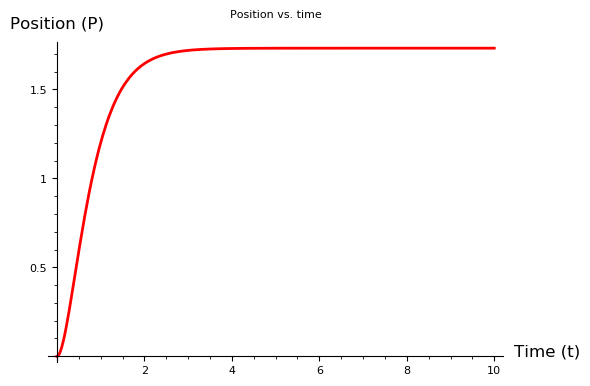

In [13]:
## Plot P(t)

# Make required substitutes
p = P.subs(P0 = p0, T = T0)  # Position

# Declare the required plot
Plot_P = plot( p, (t ,0 ,T0), thickness = '2' ,color = 'red' ,title = 'Position vs. time' ,axes_labels=['Time (t)','Position (P)'] ,axes = True ,fontsize = 8 )  # Posiiton

# Show the Plot 
Plot_P.show()  # Posititon


In [14]:
##  Function t --> v(t)

v(t) = derivative(P, t)  # Evaluate the function
v(t) = v(t).full_simplify()  # Simplify the expression
v  # Show the Function


t |--> -(0.00023591923592767*e^(2*t) - 10.39324852235696*e^t + 10.39301260312103)*e^(-3*t)

In [15]:
##  Boundary condition check on v
( v(t =0) , v(t =T0))


(1.7763568394002505e-15, 1.0710392561090422e-08)

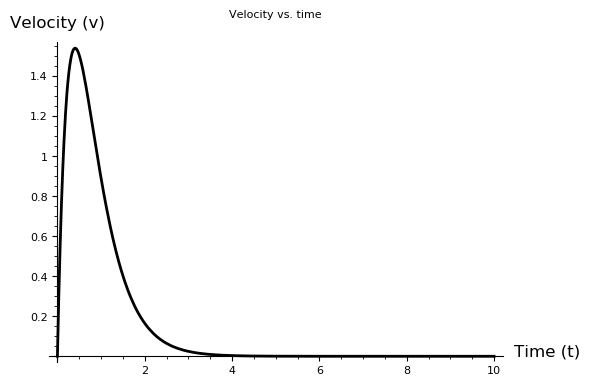

In [16]:
## Plot v(t)

# Make required substitutes
V = v.subs(P0 = p0, T = T0)  # Velocity

# Declare the required plots
Plot_v = plot( V, (t ,0 ,T0), thickness = '2' ,color = 'black' ,title = 'Velocity vs. time' ,axes_labels=['Time (t)','Velocity (v)'] ,axes = True ,fontsize = 8)  # Velocity

# Show the Plots 
Plot_v.show()  # Velocity


In [17]:
##  Function t --> a(t)

a(t) = derivative(v,t)  # 1st Order derivative dv/dt
a(t) = a(t).full_simplify()  # Simplify the expression
a  # Show the Function


t |--> (0.00023591923592767*e^(2*t) - 20.78649704471392*e^t + 31.17903780936309)*e^(-3*t)

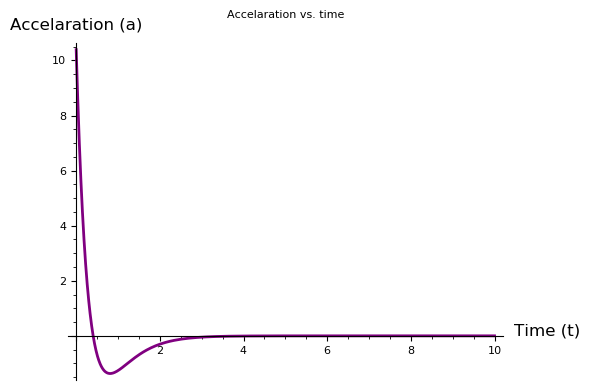

In [18]:
## Plot a(t)

# Make required substitutes
A = a.subs(P0 = p0, T = T0)  # Accelaration

# Declare the required plots
Plot_a = plot( A, (t ,0 ,T0), thickness = '2' ,color = 'purple' ,title = 'Accelaration vs. time' ,axes_labels=['Time (t)','Accelaration (a)'] ,axes = True ,fontsize = 8)  # Accelaration

# Show the Plots 
Plot_a.show()  # Accelaration


In [19]:
## Instantenous accelaration along z & x axes

az(t) = derivative(Z,t,2)  # Calculate accelaration along z axis
ax(t) = derivative(X,t,2)  # Calculate accelaration along x axis

(az,ax)  # Show t --> ( az(t) ,ax(t) )


(t |--> 586464604510422227219646115/4305653533755373139509110540496*e^(-t) - 6459066765237570131490885456859/538206691719421642438638817562*e^(-2*t) + 77507041789037310311208966543963/4305653533755373139509110540496*e^(-3*t),
 t |--> (9.631362475501192e-05)*e^(-t) - 8.486051883236607*e^(-2*t) + 12.728788883980645*e^(-3*t))

In [20]:
## Thrust 

Th(t) = m*sqrt( (az +g )^2 + ax^2)  # t --> Th(t)
Th(t) = Th(t).simplify()  # Simplify the expression
Th  # Show the function


t |--> (2.32252779319149e-31)*sqrt((586464604510422227219646115*e^(-t) - 51672534121900561051927083654872*e^(-2*t) + 77507041789037310311208966543963*e^(-3*t) + 4.22240372268021e+31)^2 + 18538652352740132143291995948640134120140093816332129255926016*((9.63136247550119e-05)*e^(-t) - 8.486051883236607*e^(-2*t) + 12.72878888398064*e^(-3*t))^2)

In [21]:
## Boundary Values of Thrust

Th0 = Th(0).subs(P0 = p0, T = T0)  # Th(0)
ThT = Th(T0).subs(P0 = p0, T = T0)  # Th(T) 

(Th0,ThT)  # Show (Th0 ,ThT )


(16.366442215739212, 9.806649981449498)

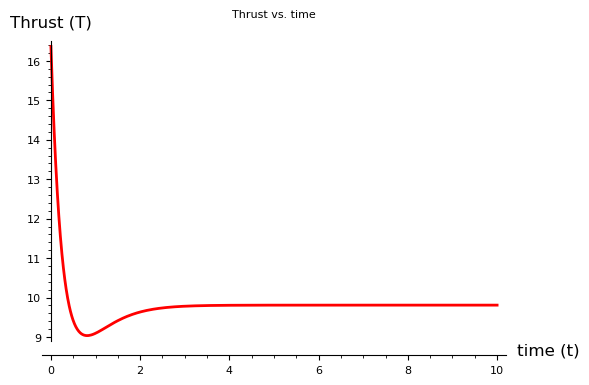

In [22]:
## Plot Th(t)

# Make required substitutes
th = Th.subs(P0 = p0, T = T0)  # Th(t)

# Declare the required plot
Plot_Th = plot( th, (t ,0 ,T0), thickness = '2' ,color = 'red' ,title = 'Thrust vs. time' ,axes_labels=['time (t)','Thrust (T)'] ,axes = True ,fontsize = 8 )  # Thrust

# Show the Plot 
Plot_Th.show()  # Thrust


In [23]:
## Roll angle θ / N

N(t) = arccos( m*( az +g) /Th )  # t --> N(t)
N(t) = N(t).simplify()  # Simplify the expression
N # Show the function


t |--> arccos(((5.864646045104219e+26)*e^(-t) - (5.167253412190054e+31)*e^(-2*t) + (7.750704178903727e+31)*e^(-3*t) + 4.22240372268021e+31)/sqrt((586464604510422227219646115*e^(-t) - 51672534121900561051927083654872*e^(-2*t) + 77507041789037310311208966543963*e^(-3*t) + 4.22240372268021e+31)^2 + 18538652352740132143291995948640134120140093816332129255926016*((9.63136247550119e-05)*e^(-t) - 8.486051883236607*e^(-2*t) + 12.72878888398064*e^(-3*t))^2))

In [24]:
## Boundary Values of Roll Angle

N0 = N(0).subs(P0 = p0, T = T0)  # N(0)
NT = N(T0).subs(P0 = p0, T = T0)  # N(T) 

(N0,NT)  # Show (N0 ,NT )


(0.26223501757030226, 1.1827430029502385e-07)

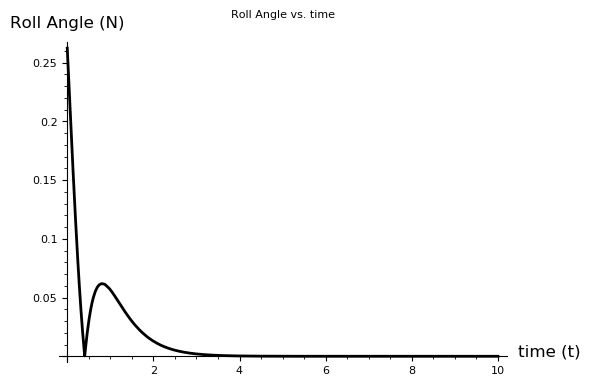

In [25]:
## Plot N(t) 

# Make required substitutes
n = N.subs(P0 = p0, T = T0)  # N(t)

# Declare the required plots
Plot_N = plot( n, (t ,0 ,T0), thickness = '2' ,color = 'black' ,title = 'Roll Angle vs. time' ,axes_labels=['time (t)','Roll Angle (N)'] ,axes = True ,fontsize = 8)  # Roll Angle

# Show the Plots 
Plot_N.show()  # Roll Angle


In [26]:
## Torque My

My(t) = Iy*derivative(N,t,2)  # t --> My(t)
My(t) = My(t).simplify()  # Simplify the expression
My


t |--> (-5.0*((586464604510422227219646115*e^(-t) - 51672534121900561051927083654872*e^(-2*t) + 77507041789037310311208966543963*e^(-3*t) + 4.22240372268021e+31)*(586464604510422227219646115*e^(-t) - 103345068243801122103854167309744*e^(-2*t) + 232521125367111930933626899631889*e^(-3*t)) - ((9.63136247550119e-05)*e^(-t) - 8.486051883236607*e^(-2*t) + 12.72878888398064*e^(-3*t))*(-(1.7855248061654315e+57)*e^(-t) + (3.1463993142127825e+62)*e^(-2*t) - (7.079237759746203e+62)*e^(-3*t)))^2*((1.759393813531266e+27)*e^(-t) - (1.550176023657015e+32)*e^(-2*t) + (2.325211253671119e+32)*e^(-3*t) + 1.2667211168040628e+32)/((586464604510422227219646115*e^(-t) - 51672534121900561051927083654872*e^(-2*t) + 77507041789037310311208966543963*e^(-3*t) + 4.22240372268021e+31)^2 + 18538652352740132143291995948640134120140093816332129255926016*((9.63136247550119e-05)*e^(-t) - 8.486051883236607*e^(-2*t) + 12.72878888398064*e^(-3*t))^2)^(5/2) + 5.0*((586464604510422227219646115*e^(-t) - 1033450682438011221038

verbose 0 (3791: plot.py, generate_plot_points) WARNING: When plotting, failed to evaluate function at 19 points.
verbose 0 (3791: plot.py, generate_plot_points) Last error message: '0.0 cannot be raised to a negative power'


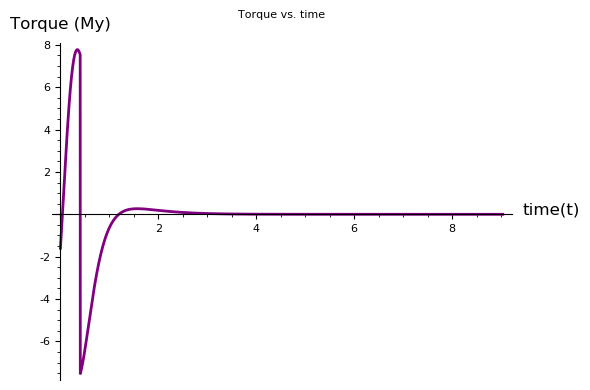

In [27]:
## Plot My(t)

# Make required substitutes
my = My.subs(P0 = p0, T = T0)  # My(t)

# Declare the required plots
Plot_My = plot( my, (t ,0 ,T0), thickness = '2' ,color = 'purple' ,title = 'Torque vs. time' ,axes_labels=['time(t)','Torque (My)'] ,axes = True ,fontsize = 8)  # Torque

# Show the Plots
Plot_My.show()  # Torque
